<a href="https://colab.research.google.com/github/Afsanameem0/first-project/blob/main/Tree_sterility_Prediction_Group_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Importing libraries
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pandas as pd
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


# Uploading the file
uploaded = files.upload()


# STEP 2: Loading the dataset
df = pd.read_csv('Tree_Sterility_Dataset.csv')

# Showing the first few rows of the dataset
df.head()

Saving Tree_Sterility_Dataset.csv to Tree_Sterility_Dataset (2).csv


,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


In [ ]:
# Number of rows and columns
print("Shape of dataset:", df.shape)

# Column names
print("\nColumns:\n", df.columns.tolist())

# Check the type of problem
print("\nTarget column 'Sterile' unique values:")
print(df['Sterile'].value_counts())

Shape of dataset: (2783, 24)

Columns:
 ['No', 'Plot', 'Subplot', 'Species', 'Light_ISF', 'Light_Cat', 'Core', 'Soil', 'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco', 'PlantDate', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Census', 'Time', 'Event', 'Harvest', 'Alive']

Target column 'Sterile' unique values:
Sterile
Non-Sterile    2360
Sterile         423
Name: count, dtype: int64


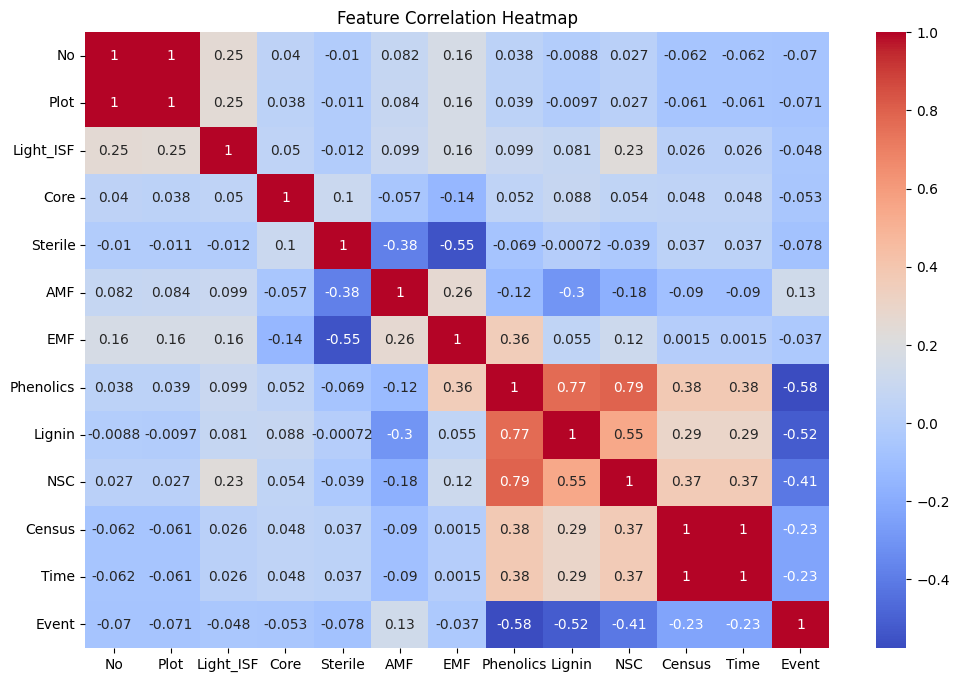

In [ ]:
# Convert categorical target to numeric for correlation
df_corr = df.copy()
df_corr['Sterile'] = df_corr['Sterile'].apply(lambda x: 1 if x == 'Sterile' else 0)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


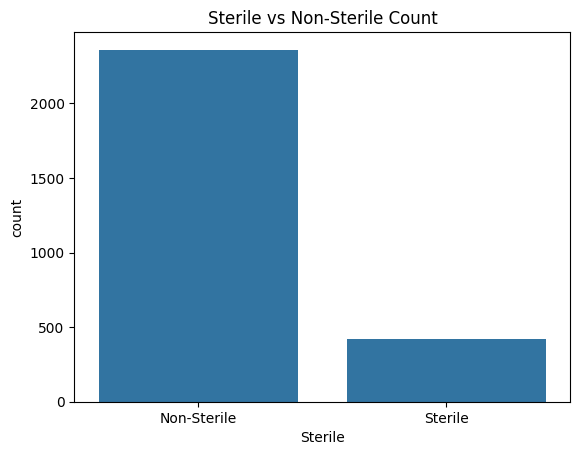

In [ ]:
# Bar chart of class balance
sns.countplot(data=df, x='Sterile')
plt.title("Sterile vs Non-Sterile Count")
plt.show()


In [ ]:
# Checking for missing values
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64


In [ ]:
# Encode 'Sterile' to binary (target)
df['Sterile'] = df['Sterile'].map({'Non-Sterile': 0, 'Sterile': 1})

# Encode categorical features using LabelEncoder (simpler for students)
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Species', 'Light_Cat', 'Soil', 'Adult']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # encode

df.head()


,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,0,0.106,2,2017,3,34,0,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,2,0.106,2,2017,5,30,0,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,3,0.106,2,2017,3,35,0,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,0,0.080,2,2016,3,35,0,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,0,0.060,1,2017,3,26,0,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


In [ ]:
# Fill numeric NaNs with mean
df = df.fillna(df.mean(numeric_only=True))



In [ ]:
from sklearn.model_selection import train_test_split
X_encoded = pd.get_dummies(X)

# Spliting again after encoding
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, stratify=y, random_state=42)

# Define X and y
X = df.drop(columns=['Sterile'])
y = df['Sterile']

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (1948, 50)
Test size: (835, 50)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       708
           1       0.25      0.04      0.07       127

    accuracy                           0.84       835
   macro avg       0.55      0.51      0.49       835
weighted avg       0.76      0.84      0.78       835



In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       708
           1       1.00      1.00      1.00       127

    accuracy                           1.00       835
   macro avg       1.00      1.00      1.00       835
weighted avg       1.00      1.00      1.00       835



In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       708
           1       1.00      0.51      0.68       127

    accuracy                           0.93       835
   macro avg       0.96      0.76      0.82       835
weighted avg       0.93      0.93      0.92       835



Class distribution:
 Sterile
0    2360
1     423
Name: count, dtype: int64


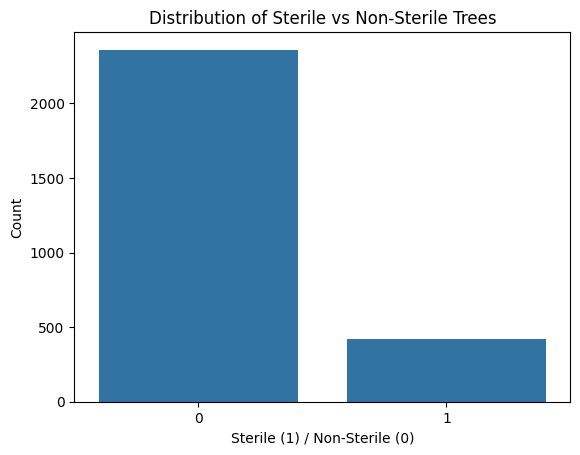

In [ ]:
#  the class distribution
class_counts = df['Sterile'].value_counts()
print("Class distribution:\n", class_counts)

# Plot bar chart
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sterile', data=df)
plt.title("Distribution of Sterile vs Non-Sterile Trees")
plt.xlabel("Sterile (1) / Non-Sterile (0)")
plt.ylabel("Count")
plt.show()

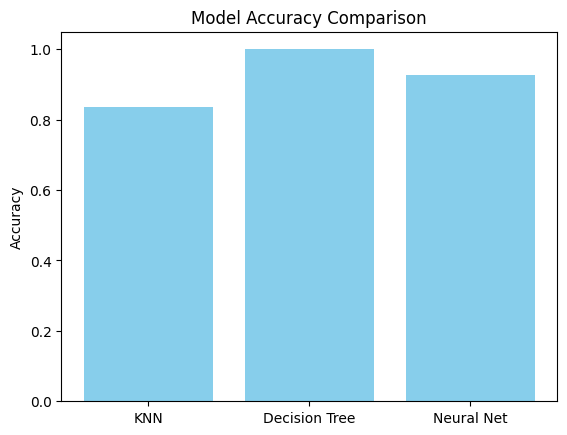

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

models = {
    'KNN': y_pred_knn,
    'Decision Tree': y_pred_tree,
    'Neural Net': y_pred_nn
}

# Accuracy comparison
accuracies = {name: accuracy_score(y_test, pred) for name, pred in models.items()}
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
for name, pred in models.items():
    print(f"\n{name} Confusion Matrix:")
    print(confusion_matrix(y_test, pred))


KNN Confusion Matrix:
[[693  15]
 [122   5]]

Decision Tree Confusion Matrix:
[[708   0]
 [  0 127]]

Neural Net Confusion Matrix:
[[708   0]
 [ 62  65]]


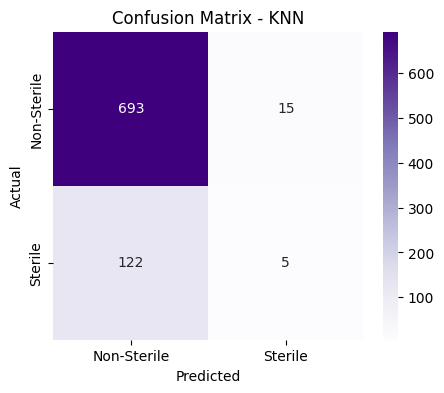

In [ ]:
#cconfusion metrics for knn
y_pred_knn = knn.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Non-Sterile', 'Sterile'],
            yticklabels=['Non-Sterile', 'Sterile'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

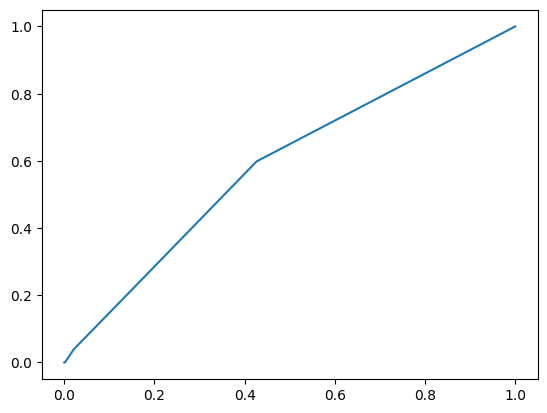

In [ ]:
#roc curve & auc for knn
y_probs_knn = knn.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % auc_knn)

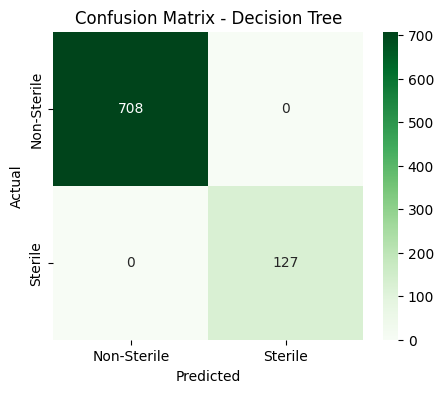

In [ ]:
#Decision tree
y_pred_tree = tree.predict(X_test)

cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Sterile', 'Sterile'],
            yticklabels=['Non-Sterile', 'Sterile'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

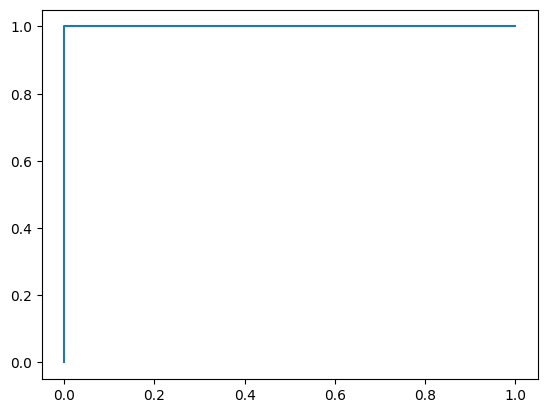

In [ ]:
#Decision Tree
y_probs_tree = tree.predict_proba(X_test)[:, 1]

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_probs_tree)
auc_tree = auc(fpr_tree, tpr_tree)

plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = %0.2f)' % auc_tree)


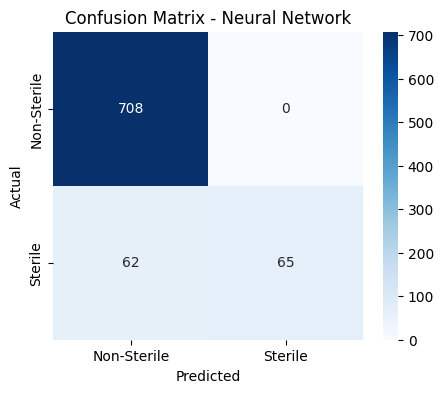

In [ ]:
#neural network
y_pred_nn = nn.predict(X_test)
y_pred_nn_classes = (y_pred_nn > 0.5).astype(int).ravel()

cm_nn = confusion_matrix(y_test, y_pred_nn_classes)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Sterile', 'Sterile'],
            yticklabels=['Non-Sterile', 'Sterile'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()

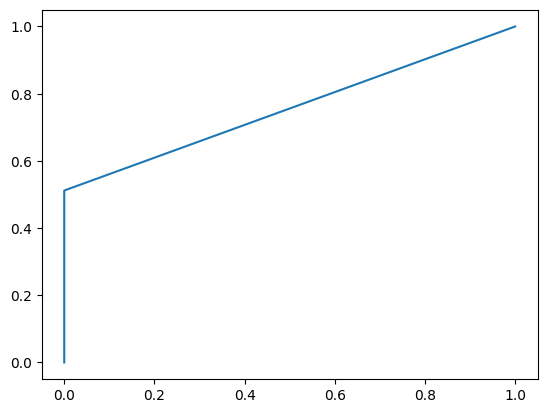

In [ ]:
#neural networ er roc curve
y_probs_nn = y_pred_nn.ravel()

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_probs_nn)
auc_nn = auc(fpr_nn, tpr_nn)

plt.plot(fpr_nn, tpr_nn, label='Neural Net (AUC = %0.2f)' % auc_nn)


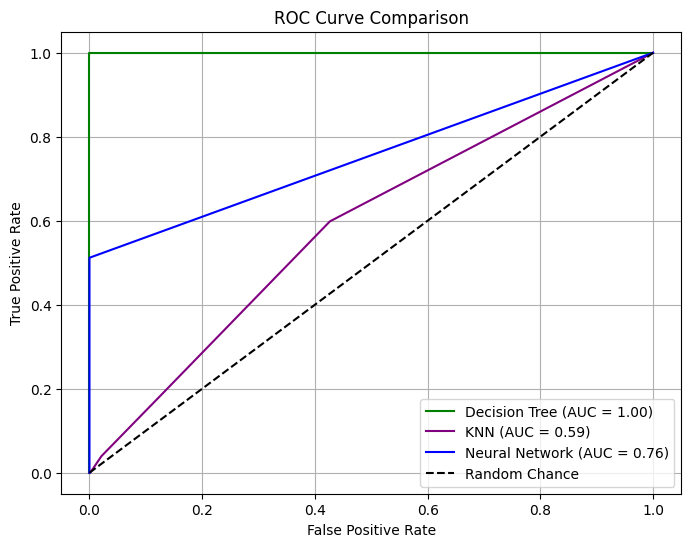

In [ ]:
plt.figure(figsize=(8, 6))

# Plot each model's ROC curve
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = %0.2f)' % auc_tree, color='green')
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % auc_knn, color='purple')
plt.plot(fpr_nn, tpr_nn, label='Neural Network (AUC = %0.2f)' % auc_nn, color='blue')

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Labeling
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
